In [131]:
import sys
sys.path.append('..' + '/')

from helper import *

In [132]:
def exp_decay(epoch, initial_lrate):
  return math.exp(-0.05 * (epoch + 10)) * initial_lrate

In [133]:
class minibatch:
    def mse_loss(self, x):
        y_pred = np.dot(self.X, x)
        mse = np.mean((self.y - y_pred) ** 2)
        return mse

    def mse_loss_grad(self, x):
        # print(self.X.shape, self.y.shape)

        # Choose n random data points from the training set without replacement
        indices = np.random.choice(self.X.shape[0], self.batch_size, replace=False)
        X_batch = self.X[indices, :]
        y_batch = self.y[indices]

        # print(X_batch.shape, y_batch.shape)

        # Compute the gradient of the MSE loss with respect to x for the chosen data points
        y_pred = np.dot(X_batch, x)
        grad = 2 * np.dot(X_batch.T, (y_pred - y_batch))

        # print(grad)

        # Sum values in rows of grad and divide by n
        # grad_mean = np.sum(grad, axis=1) / self.batch_size

        # print(grad_mean)
        return grad
    
    def __init__(self, X, y, batch_size=2, method='mse'):
        self.X = X
        self.y = y
        self.batch_size = batch_size

        if self.batch_size > X.shape[0]:
            self.batch_size = X.shape[0]

        if method == 'mse':
            self.f = self.mse_loss 
            self.grad = self.mse_loss_grad
        else:
            print('method not found')
        

    def constant_lr_scheduling(epoch, initial_lr):
        return initial_lr

    def gradient_descent(self, x0, lr_scheduling_func=constant_lr_scheduling, initial_lr=0.001, max_epochs=100, eps=1e-5, minimum = 0.0, apply_min=False, apply_value=True):
        """
        Cтохастический градиентный спуск для поиска минимума функции.

        Аргументы:
            x0 (list): Начальную точка, с которой начинается поиск.
            initial_lr (float): learning_rate - Начальная скорость обучения или шаг градиентного спуска.
            max_epochs (int): Максимальное количество эпох или итераций для выполнения алгоритма.
            minimum (float): Минимум функции.
            epsilon (float): Малое число, используемое как критерий останова для алгоритма.
        Возвращает:
            Список всех точек, посещенных во время алгоритма.
        """
        return custom_gradient_descent_with_lr_scheduling(self.f, self.grad, x0, lr_scheduling_func, initial_lr, max_epochs, eps, minimum, apply_min, apply_value)
    
    def get_loss_history(self, results):
        loss_history = []

        for i in range(len(results)):
            loss_history.append(self.f(results[i]))

        return loss_history
    


In [134]:
class get_model_LinearRegression:
    def __init__(self, batch_size=None):
        self.coef_ = []
        self.intercept_ = None
        self.batch_size = batch_size

    def fit(self, X_train, y_train, epsilon=24, learning_rate=0.001, max_epochs=100, batch_size=1, apply_min=True):
        X = X_train 
        y = y_train

        if self.batch_size is not None:
            batch_size = self.batch_size

        mb_gd = minibatch(X, y, batch_size=batch_size)
        x0 = np.zeros(X.shape[1], dtype=float)

        results = mb_gd.gradient_descent(x0, lr_scheduling_func=exp_decay, max_epochs=10000, initial_lr=1e-1, eps=80, apply_min=True, apply_value=True)

        self.coef_ = results[-1][:-1]
        self.intercept_ = results[-1][-1] 

    def predict(self, X_test):
        y_pred = []

        for i in range(len(X_test)):
            y = self.intercept_ + sum([self.coef_[j] * float(X_test[i][j]) for j in range(len(self.coef_))])
            y_pred.append(y)
        return y_pred

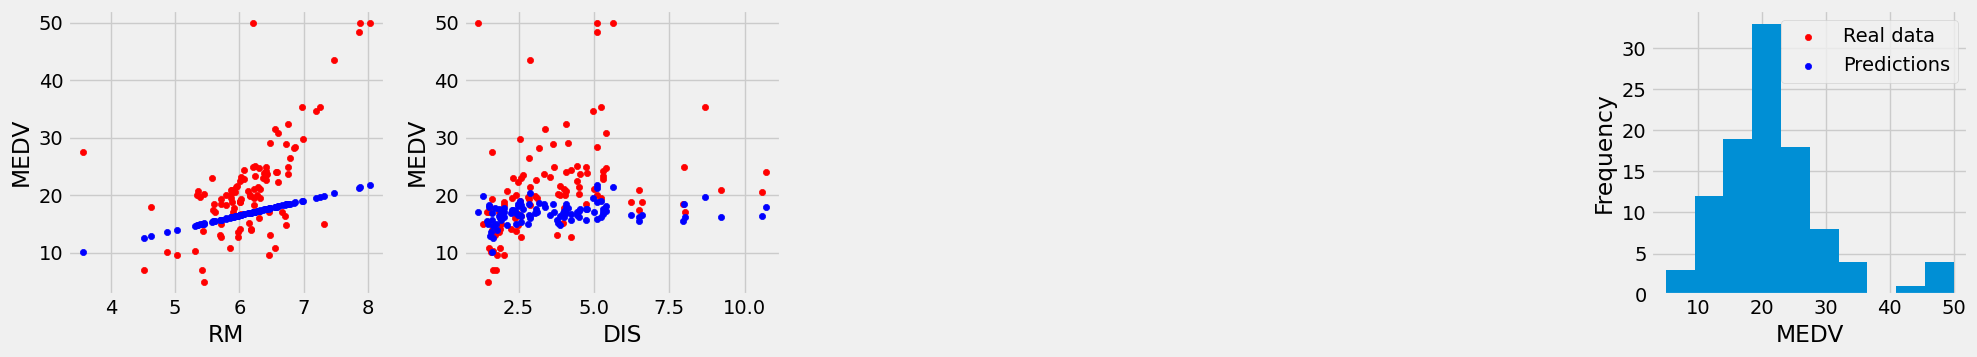

MSE: 78.60520905116323
R^2: -0.07188263940121331


(78.60520905116323, -0.07188263940121331)

In [135]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True , parser='liac-arff')
model = get_model_LinearRegression(batch_size=500)

boston.feature_names = ['RM', 'DIS']
train_test_print_model(model, boston, X=boston.data[['RM', 'DIS']].values, print_result=True, view_graphics=True)

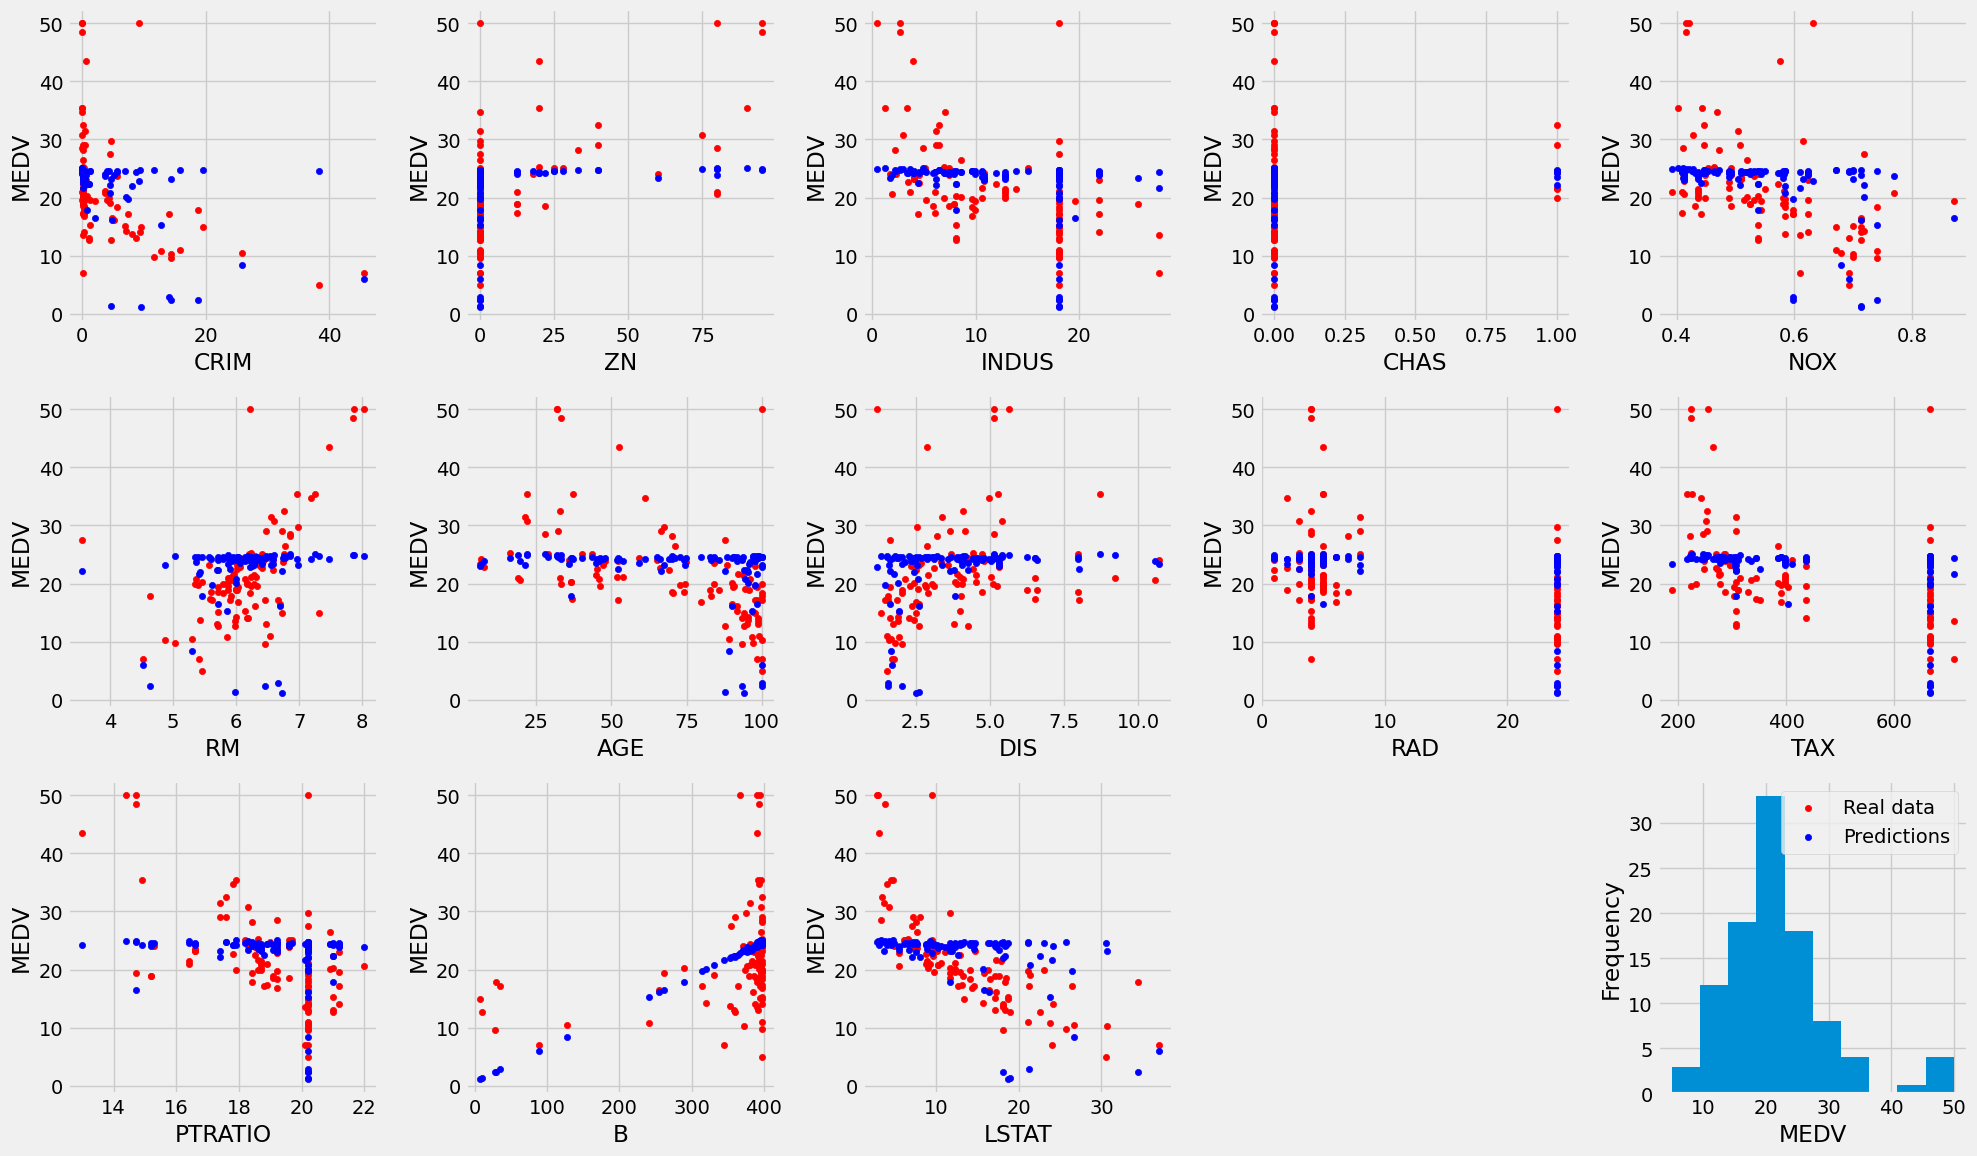

MSE: 73.65766603024244
R^2: -0.004416557498627904


(73.65766603024244, -0.004416557498627904)

In [136]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True , parser='liac-arff')
model = get_model_LinearRegression(batch_size=500)

train_test_print_model(model, boston, print_result=True, view_graphics=True)